# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
weather_json=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)



url = "http://api.openweathermap.org/data/2.5/weather?&appid=" + weather_api_key + "&q="
# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#declare lists for every attribute to be saved from results
weather_json=[]
city_name=[]
lat = []
lng=[]
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country =[]
date =[]
#declare x to make output clearer
x=1
print ("Beginning Data Retrieval")
print ("-----------------------------")
#for loop starts using city names from the unique cities list
for city in cities:
    #creates URL using url varibale and city most recently called in for loop
    target_url = url + str(city)
    #calls API using the created URL
    response= requests.get(target_url)
    #saves JSON data from API
    weather_response = requests.get(target_url).json()
    #if statement removes responses with no data
    if response.status_code == 404:
            print(f"{city} not found. Skipping...")
            x=x+1
            next
    #responses with data have attributes appended to list
    else:
        print(f"Processing Record {x} | {city}")
        city_name.append(city)
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        x=x+1


Beginning Data Retrieval
-----------------------------
taolanaro not found. Skipping...
Processing Record 2 | san quintin
Processing Record 3 | salinopolis
Processing Record 4 | amahai
Processing Record 5 | rikitea
Processing Record 6 | kongwa
Processing Record 7 | atuona
illoqqortoormiut not found. Skipping...
Processing Record 9 | qaanaaq
Processing Record 10 | nagornskiy
Processing Record 11 | sal rei
Processing Record 12 | hithadhoo
Processing Record 13 | axim
Processing Record 14 | ambilobe
Processing Record 15 | ostrovnoy
saleaula not found. Skipping...
Processing Record 17 | cidreira
Processing Record 18 | ushuaia
Processing Record 19 | labuan
Processing Record 20 | noumea
Processing Record 21 | busselton
Processing Record 22 | saint-francois
Processing Record 23 | paris
Processing Record 24 | yellowknife
Processing Record 25 | bridlington
Processing Record 26 | punta arenas
Processing Record 27 | ulladulla
Processing Record 28 | saint-denis
Processing Record 29 | cuenca
Process

Processing Record 247 | castro
Processing Record 248 | copiapo
Processing Record 249 | klaksvik
marcona not found. Skipping...
Processing Record 251 | umea
Processing Record 252 | lima
Processing Record 253 | chokurdakh
Processing Record 254 | hobyo
attawapiskat not found. Skipping...
Processing Record 256 | bure
Processing Record 257 | cayenne
Processing Record 258 | inegol
Processing Record 259 | novyy urengoy
Processing Record 260 | ialibu
Processing Record 261 | sao miguel do araguaia
nguiu not found. Skipping...
Processing Record 263 | husavik
jinchengjiang not found. Skipping...
Processing Record 265 | kloulklubed
Processing Record 266 | la ronge
Processing Record 267 | alaca
Processing Record 268 | atbasar
Processing Record 269 | fuerte olimpo
skalistyy not found. Skipping...
Processing Record 271 | bambous virieux
Processing Record 272 | chato
Processing Record 273 | nehe
Processing Record 274 | maralal
Processing Record 275 | batticaloa
Processing Record 276 | ilulissat
Proces

Processing Record 494 | lata
Processing Record 495 | reconquista
Processing Record 496 | guara
Processing Record 497 | chabahar
Processing Record 498 | achinsk
Processing Record 499 | gold coast
Processing Record 500 | guerrero negro
Processing Record 501 | karratha
Processing Record 502 | hualmay
Processing Record 503 | chulman
Processing Record 504 | jalu
Processing Record 505 | lerwick
Processing Record 506 | fort nelson
Processing Record 507 | gamboma
Processing Record 508 | gazojak
Processing Record 509 | saint-louis
Processing Record 510 | carndonagh
Processing Record 511 | gijon
ruatoria not found. Skipping...
Processing Record 513 | diban
Processing Record 514 | saint-joseph
tumannyy not found. Skipping...
Processing Record 516 | aviles
Processing Record 517 | kassala
grand centre not found. Skipping...
Processing Record 519 | westport
Processing Record 520 | margate
Processing Record 521 | quelimane
Processing Record 522 | yulara
bolshoy tsaryn not found. Skipping...
Processin

In [7]:
#create dictionary using lists of attributes
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng" : lng,
    #convert kelvin to fahrenheit
    "Max Temp in F": (np.asarray(max_temp)- 273.15) * 9/5 + 32,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
#load dictionary into data fram
weather_data = pd.DataFrame(weather_dict)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#export the data to a CSV for use in next section
weather_data.to_csv ("../VacationPy/Input/weather_data.csv", index = False, header=True)
#display datafram
weather_data

,City,Lat,Lng,Max Temp in F,Humidity,Cloudiness,Wind Speed,Country,Date
0,san quintin,30.4833,-115.9500,59.684,72,0,2.18,MX,1612670559
1,salinopolis,-0.6136,-47.3561,78.800,87,62,3.75,BR,1612670969
2,amahai,-3.3333,128.9167,87.494,61,70,3.05,ID,1612670969
3,rikitea,-23.1203,-134.9692,78.170,72,100,5.97,PF,1612670580
4,kongwa,-6.2000,36.4167,65.408,95,99,0.62,TZ,1612670970
...,...,...,...,...,...,...,...,...,...
542,guardiagrele,42.1954,14.2198,48.200,100,90,2.06,IT,1612671266
543,sistranda,63.7256,8.8340,21.200,86,20,6.17,NO,1612670970
544,villeneuve-loubet,43.6666,7.1204,59.000,77,75,5.14,FR,1612671267
545,sibolga,1.7427,98.7792,87.386,55,25,1.72,ID,1612671267


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#Locates all rows with less than 100 in the Humidity column and saves them to a new dataframe
dry_weather=weather_data.loc[weather_data["Humidity"]<100]
dry_weather

,City,Lat,Lng,Max Temp in F,Humidity,Cloudiness,Wind Speed,Country,Date
0,san quintin,30.4833,-115.9500,59.684,72,0,2.18,MX,1612670559
1,salinopolis,-0.6136,-47.3561,78.800,87,62,3.75,BR,1612670969
2,amahai,-3.3333,128.9167,87.494,61,70,3.05,ID,1612670969
3,rikitea,-23.1203,-134.9692,78.170,72,100,5.97,PF,1612670580
4,kongwa,-6.2000,36.4167,65.408,95,99,0.62,TZ,1612670970
...,...,...,...,...,...,...,...,...,...
541,pasighat,28.0667,95.3333,74.354,23,9,1.21,IN,1612671265
543,sistranda,63.7256,8.8340,21.200,86,20,6.17,NO,1612670970
544,villeneuve-loubet,43.6666,7.1204,59.000,77,75,5.14,FR,1612671267
545,sibolga,1.7427,98.7792,87.386,55,25,1.72,ID,1612671267


In [10]:
#  Get the indices of cities that have humidity over 100%.
wet_weather=weather_data["Humidity"].loc[lambda x: x>=100].index
wet_weather

Int64Index([ 70, 104, 123, 156, 234, 235, 264, 302, 314, 326, 345, 380, 382,
            405, 501, 511, 531, 542],
           dtype='int64')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

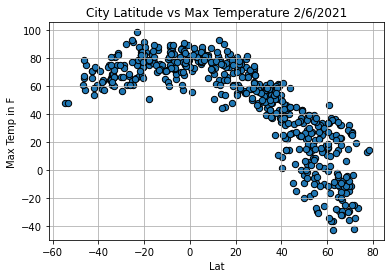

In [14]:
dry_weather.plot.scatter('Lat','Max Temp in F',edgecolors="black",
                         grid=True, title='City Latitude vs Max Temperature 2/6/2021', s=40)
plt.savefig('./Charts/Lat_vs_Max_Temp_2-6-2021.png')

#### Analysis
This plot is comparing the latitude of the city to the max temperature expected that day. The arching shape with a higher left hand side illustrates that currently it in on average warmer in the southern hemisphere as it is now their summer.

### Latitude vs. Humidity Plot

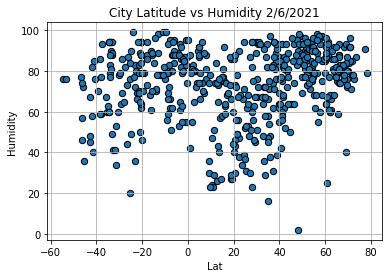

In [15]:
dry_weather.plot.scatter('Lat','Humidity',edgecolors="black",
                         grid=True, title='City Latitude vs Humidity 2/6/2021', s=40)
plt.savefig('./Charts/Lat_vs_Humidity_2-6-2021.png')

#### Analysis
This plot is comparing the latitude of the city to the humidity. This distribution of this plot indicates there is probably very little correlation between humidity and latitude. Most cities are above the 50% humidity with a large cluster of northern cities between 40 degrees and 60 degrees north having over 80% humidity. Only 3 cities in the data have a humidity of 20% or less

### Latitude vs. Cloudiness Plot

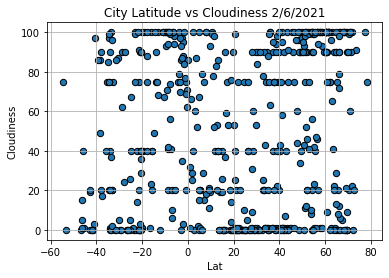

In [16]:
dry_weather.plot.scatter('Lat','Cloudiness', edgecolors="black", grid=True, title='City Latitude vs Cloudiness 2/6/2021',s=40)
plt.savefig('./Charts/Lat_vs_Cloudiness_2-6-2021.png')

#### Analysis
This plot is comparing the latitude of the city to the cloudiness. This plot indicates there is really no correlation between cloud cover and latitude, however the distribution implies that it is significantly more likely to have a cloudiness value of 0 or 100 rather than in between.

### Latitude vs. Wind Speed Plot

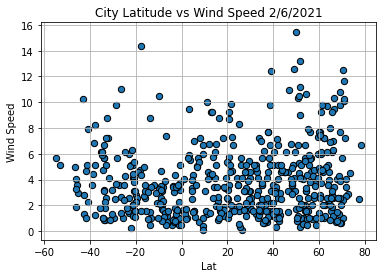

In [17]:
dry_weather.plot.scatter('Lat','Wind Speed', edgecolors="black", grid=True, title='City Latitude vs Wind Speed 2/6/2021', s=40)
plt.savefig('./Charts/Lat_vs_Wind_Speed_2-6-2021.png')

#### Analysis
This plot is comparing the latitude of the city to the wind speed. This plot indicates there is really no correlation between wind speed and latitude. However the distribution implies that the average wind speed in the data is fairly low with most cities having a wind speed below 6 and only 2 cities having wind above 14 mph.

## Linear Regression

In [19]:
#split the dataframe into northern and southern cities
south=dry_weather.loc[dry_weather["Lat"]<=0]
north=dry_weather.loc[dry_weather["Lat"]>=0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8533768584560156


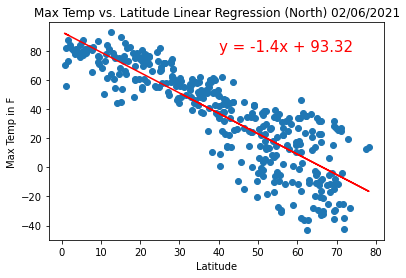

In [20]:
lat_nh=north["Lat"].tolist()
y_nh=north["Max Temp in F"].tolist()
lat_nh=np.asarray(lat_nh)
plt.scatter(lat_nh,y_nh)
plt.xlabel("Latitude")
plt.ylabel("Max Temp in F")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_nh, y_nh)
regress_values = lat_nh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_nh,regress_values,"r-")
plt.annotate(line_eq,(40, 80),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.title("Max Temp vs. Latitude Linear Regression (North) 02/06/2021")
plt.savefig('./Charts/Lat_vs_Max_Temp_NH_2-6-2021.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.44997573315054895


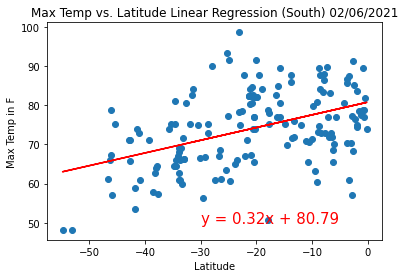

In [24]:
lat_sh=south["Lat"].tolist()
y_sh=south["Max Temp in F"].tolist()
lat_sh=np.asarray(lat_sh)
plt.scatter(lat_sh,y_sh)
plt.xlabel("Latitude")
plt.ylabel("Max Temp in F")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_sh, y_sh)
regress_values = lat_sh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_sh,regress_values,"r-")
plt.annotate(line_eq,(-30, 50),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.title("Max Temp vs. Latitude Linear Regression (South) 02/06/2021")
plt.savefig('./Charts/Lat_vs_Max_Temp_SH_2-6-2021.png')
plt.show()

#### Analysis
This pair of plots is comparing the latitude of the city to the max temperature. Once again in the northern hemisphere you can see a rapid decline in temperature as the latitude increases due to it being winter. The northern data appears to be clustered closer to the line of best fit however the range on the x-axis of the northern plot is over twice the range of the x-axis on the southern plot which may cause confusion

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.36258206868956466


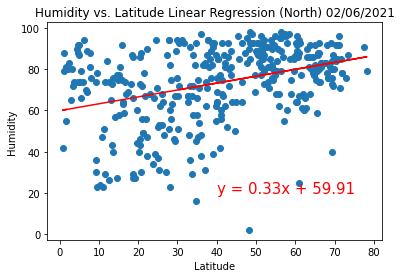

In [25]:
y_nh=north["Humidity"].tolist()
plt.scatter(lat_nh,y_nh)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_nh, y_nh)
regress_values = lat_nh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_nh,regress_values,"r-")
plt.annotate(line_eq,(40, 20),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.title("Humidity vs. Latitude Linear Regression (North) 02/06/2021")
plt.savefig('./Charts/Lat_vs_Humidity_NH_2-6-2021.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2676408478136335


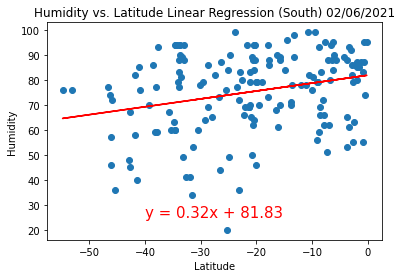

In [26]:
y_sh=south["Humidity"].tolist()
plt.scatter(lat_sh,y_sh)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_sh, y_sh)
regress_values = lat_sh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_sh,regress_values,"r-")
plt.annotate(line_eq,(-40, 25),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.title("Humidity vs. Latitude Linear Regression (South) 02/06/2021")
plt.savefig('./Charts/Lat_vs_Humidity_SH_2-6-2021.png')
plt.show()

#### Analysis
This pair of plots is comparing the latitude of the city to the humidity. The liner regression supports the idea that latitude has little to do with humidity with both plots having fairly low r-values. It is interesting to note that both lines trend downward the lower the latitude which could be used to argue that the humidty is higher at the north pole than the south.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.29317514985230675


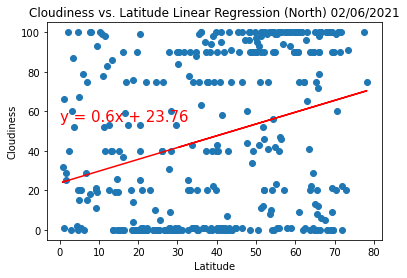

In [27]:
y_nh=north["Cloudiness"].tolist()
plt.scatter(lat_nh,y_nh)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_nh, y_nh)
regress_values = lat_nh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_nh,regress_values,"r-")
plt.annotate(line_eq,(0, 55),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.title("Cloudiness vs. Latitude Linear Regression (North) 02/06/2021")
plt.savefig('./Charts/Lat_vs_Cloudiness_NH_2-6-2021.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3788367411045356


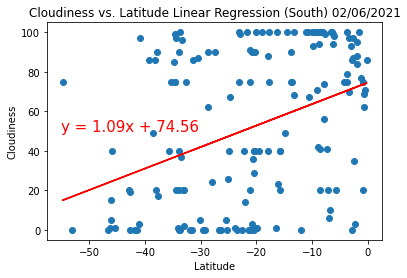

In [28]:
y_sh=south["Cloudiness"].tolist()
plt.scatter(lat_sh,y_sh)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_sh, y_sh)
regress_values = lat_sh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_sh,regress_values,"r-")
plt.annotate(line_eq,(-55, 50),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.title("Cloudiness vs. Latitude Linear Regression (South) 02/06/2021")
plt.savefig('./Charts/Lat_vs_Cloudiness_SH_2-6-2021.png')
plt.show()

#### Analysis
This pair of plots is comparing the latitude of the city to the cloudiness. While the r-value on plot for the southern hemisphere is not incredibly low the fact that most data points are not even close to the line on either plot indicates how all or nothing this particulate attribute seems to be.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.12610406097191038


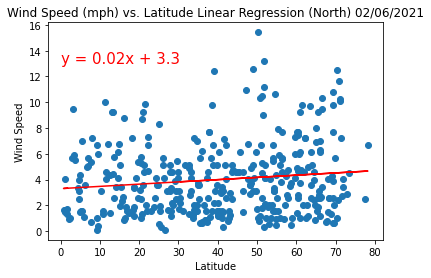

In [32]:
y_nh=north["Wind Speed"].tolist()
plt.scatter(lat_nh,y_nh)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_nh, y_nh)
regress_values = lat_nh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_nh,regress_values,"r-")
plt.annotate(line_eq,(0, 13),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.title("Wind Speed (mph) vs. Latitude Linear Regression (North) 02/06/2021")
plt.savefig('./Charts/Lat_vs_Wind_Speed_NH_2-6-2021.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.30646097499023195


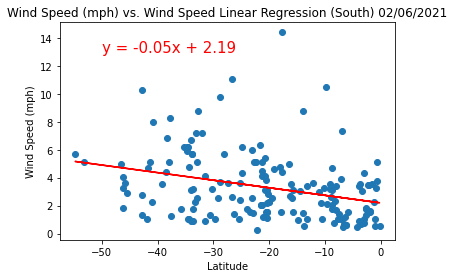

In [33]:
y_sh=south["Wind Speed"].tolist()
plt.scatter(lat_sh,y_sh)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_sh, y_sh)
regress_values = lat_sh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_sh,regress_values,"r-")
plt.annotate(line_eq,(-50, 13),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.title("Wind Speed (mph) vs. Wind Speed Linear Regression (South) 02/06/2021")
plt.savefig('./Charts/Lat_vs_Wind_Speed_SH_2-6-2021.png')
plt.show()

#### Analysis
This pair of plots is comparing the latitude of the city to the wind speed. These plots support the hypothesis that latitude has little effect on wind speed, both have very low r-values with the plot for the northern hemisphere having the most data points and the lowest r-value. 

## Final conclusion
While temperature is most certainly affected by latitude the data also indicates that the season also needs to be taken into account. The other 3 attributes graphed against latitude seemed to have very little relation to it and other factors such as the seasons and landscape most likely will have a greater effect on the local weather when it comes to cloudiness, wind speed and humidity. 